# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.16 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [1]:
from unityagents import UnityEnvironment
import numpy as np

#env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")
env = UnityEnvironment(file_name="/home/tullio/GIT/nanodegrees_deep_RL/P3_Collaboration_and_Competition/Tennis_Linux/Tennis.x86_64",no_graphics=True)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [4]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [5]:
import ddpg_agent
#from ddpg_agent import Agent
from ddpg_agent_PER import Agent

import time
import torch
import matplotlib.pyplot as plt

In [6]:
_target_score = 0.50
_target_episodes = 100

## Define the training function
def maddpg(n_episodes=10, max_t=200):
    """Deep Deterministic Policy Gradients (DDPG).
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []      # episodic scores
    scores1,scores2 = [],[]
    scores_max = []
    moving_avg = []  # moving average over 100 episodes and over all agents
    print_every = 10
    time_stamp = 0
    ## Perform n_episodes of training
    time_training_start = time.time()
    for i_episode in range(1, n_episodes+1):
        time_episode_start = time.time()
        agent.noise.reset()
        states = env.reset(train_mode=True)[brain_name].vector_observations
        scores_episode = np.zeros(num_agents)           # rewards per episode for each agent

        for t in range(1, max_t+1):
        #hile True:
            # Perform a step: S;next_stateA;R;S'
            actions = agent.act(states)                 # select the next action for each agent
            env_info = env.step(actions)[brain_name]    # send the actions to the environment
            rewards = env_info.rewards                  # get the rewards
            next_states = env_info.vector_observations  # get the next states
            done = env_info.local_done
            
            # Send the results to the Agent
            if np.any(done):
                time_stamp = 10
            agent.step(states, actions, rewards, next_states, done, time_stamp)
            # Update the variables for the next iteration
            states = next_states
            scores_episode += rewards
            
            if np.any(done): # exit loop when episode ends
                break
        # Store the rewards and calculate the moving average
        
        scores.append(np.mean(scores_episode))
        scores1.append(scores_episode[0])
        scores2.append(scores_episode[1])
        scores_max.append(np.max(scores_episode))
        moving_avg.append(np.mean(scores_max[-_target_episodes:], axis=0))
        
        # Calculate the elapsed time
        time_episode = time.time() - time_episode_start
        time_elapsed = time.time() - time_training_start
        time_episode_str = time.strftime('%Mm%Ss', time.gmtime(time_episode))

        
        ## Print the results for this episode
        print('Episode {:3d} ({})\tScore: {:5.2f} (Agent1: {:5.2f} / Agent2: {:5.2f})\t' \
          'Moving average: {:5.2f} ' \
          .format(i_episode, time_episode_str, np.mean(scores_episode),
                  scores_episode[0], 
                  scores_episode[1],
                  moving_avg[-1] ))
        
        if i_episode % print_every == 0:
            ## Save the model along with some training information
            time_elapsed_str = time.strftime('%Hh%Mm%Ss', time.gmtime(time_elapsed))
            checkpoint = {
                'actor_dict': agent.actor_local.state_dict(),
                'critic_dict': agent.critic_local.state_dict(),
                'ddpg_params': {
                    'batch_size': ddpg_agent.BATCH_SIZE,
                    'buffer_size': ddpg_agent.BUFFER_SIZE,
                    'gamma': ddpg_agent.GAMMA,
                    'lr_actor': ddpg_agent.LR_ACTOR,
                    'lr_critic': ddpg_agent.LR_CRITIC,
                    'tau': ddpg_agent.TAU,
                    },
                'episodes': i_episode,
                'elapsed_time': time_elapsed_str,
                'scores': scores,
                'moving_avg': moving_avg,
                }
            print('\nSaving model ...', end=' ')
            torch.save(checkpoint, 'checkpoint_ddpg_xx.pt')
            print('done.')
            
        ## Check if the environment has been solved
        if moving_avg[-1].mean() >= _target_score :
            time_elapsed_str = time.strftime('%Hh%Mm%Ss', time.gmtime(time_elapsed))
            print('\nEnvironment solved in {:d} episodes!\t' \
                  'Average Score: {:.2f}\tElapsed time: {}'
                  .format(i_episode-_target_episodes, moving_avg[-1].mean(),
                          time_elapsed_str))
            checkpoint = {
                'actor_dict': agent.actor_local.state_dict(),
                'critic_dict': agent.critic_local.state_dict(),
                'ddpg_params': {
                    'batch_size': ddpg_agent.BATCH_SIZE,
                    'buffer_size': ddpg_agent.BUFFER_SIZE,
                    'gamma': ddpg_agent.GAMMA,
                    'lr_actor': ddpg_agent.LR_ACTOR,
                    'lr_critic': ddpg_agent.LR_CRITIC,
                    'tau': ddpg_agent.TAU,
                    },
                'episodes': i_episode,
                'elapsed_time': time_elapsed_str,
                'scores': scores,
                'moving_avg': moving_avg,
                }
            print('\nSaving model ...', end=' ')
            torch.save(checkpoint, 'checkpoint_ddpg_xx.pt')
            print('done.')
            
            break

    return scores, scores1, scores2, moving_avg

In [7]:
# Create the Agent
agent = Agent(state_size, action_size, random_seed=13,num_agents=num_agents)

# Train the Agent
score, scores1, scores2, moving_avg = maddpg(n_episodes=3000,max_t=2000)

Using:  cpu
Actor network built: [Linear(in_features=24, out_features=128, bias=True), Linear(in_features=128, out_features=64, bias=True), Linear(in_features=64, out_features=2, bias=True)]
Actor network built: [Linear(in_features=24, out_features=128, bias=True), Linear(in_features=128, out_features=64, bias=True), Linear(in_features=64, out_features=2, bias=True)]
Critic network built: [Linear(in_features=24, out_features=128, bias=True), Linear(in_features=130, out_features=64, bias=True), Linear(in_features=64, out_features=1, bias=True)]
Critic network built: [Linear(in_features=24, out_features=128, bias=True), Linear(in_features=130, out_features=64, bias=True), Linear(in_features=64, out_features=1, bias=True)]
Episode   1 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode   2 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode   3 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Epi

Episode  83 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode  84 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode  85 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode  86 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode  87 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode  88 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode  89 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode  90 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 

Saving model ... done.
Episode  91 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode  92 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode  93 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.0

Episode 173 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.02 
Episode 174 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.02 
Episode 175 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.02 
Episode 176 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.02 
Episode 177 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.02 
Episode 178 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.02 
Episode 179 (00m00s)	Score:  0.05 (Agent1:  0.00 / Agent2:  0.09)	Moving average:  0.02 
Episode 180 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.02 

Saving model ... done.
Episode 181 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.02 
Episode 182 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.02 
Episode 183 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.0

Episode 263 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.03 
Episode 264 (00m00s)	Score:  0.05 (Agent1:  0.00 / Agent2:  0.09)	Moving average:  0.03 
Episode 265 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.03 
Episode 266 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.03 
Episode 267 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.03 
Episode 268 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.03 
Episode 269 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.03 
Episode 270 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.03 

Saving model ... done.
Episode 271 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.03 
Episode 272 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.03 
Episode 273 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.0

Episode 353 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.01 
Episode 354 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.01 
Episode 355 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.01 
Episode 356 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.01 
Episode 357 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.01 
Episode 358 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.01 
Episode 359 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.01 
Episode 360 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.01 

Saving model ... done.
Episode 361 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.01 
Episode 362 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.01 
Episode 363 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.0

Episode 443 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 444 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 445 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 446 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 447 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 448 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 449 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 450 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 

Saving model ... done.
Episode 451 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 452 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 453 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.0

Episode 533 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 534 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 535 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 536 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 537 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 538 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 539 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 540 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 

Saving model ... done.
Episode 541 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 542 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 543 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.0

Episode 623 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 624 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 625 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 626 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 627 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 628 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 629 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 630 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 

Saving model ... done.
Episode 631 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 632 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 633 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.0

Episode 714 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.00 
Episode 715 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 716 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 717 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 718 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.00 
Episode 719 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 720 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 

Saving model ... done.
Episode 721 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.00 
Episode 722 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.01 
Episode 723 (00m00s)	Score:  0.04 (Agent1: -0.02 / Agent2:  0.10)	Moving average:  0.01 
Episode 724 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.0

Episode 804 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.03 
Episode 805 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.03 
Episode 806 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.03 
Episode 807 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.04 
Episode 808 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.04 
Episode 809 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.04 
Episode 810 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.04 

Saving model ... done.
Episode 811 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.04 
Episode 812 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.04 
Episode 813 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.04 
Episode 814 (00m00s)	Score:  0.15 (Agent1:  0.20 / Agent2:  0.09)	Moving average:  0.0

Episode 894 (00m00s)	Score:  0.05 (Agent1:  0.00 / Agent2:  0.09)	Moving average:  0.07 
Episode 895 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.07 
Episode 896 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.07 
Episode 897 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.07 
Episode 898 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.07 
Episode 899 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.07 
Episode 900 (00m00s)	Score:  0.05 (Agent1:  0.00 / Agent2:  0.09)	Moving average:  0.07 

Saving model ... done.
Episode 901 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.07 
Episode 902 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.07 
Episode 903 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.07 
Episode 904 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.0

Episode 984 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.05 
Episode 985 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.05 
Episode 986 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.05 
Episode 987 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.05 
Episode 988 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.05 
Episode 989 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.05 
Episode 990 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.05 

Saving model ... done.
Episode 991 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.05 
Episode 992 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.05 
Episode 993 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.05 
Episode 994 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.0

Episode 1073 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.03 
Episode 1074 (00m00s)	Score:  0.15 (Agent1:  0.10 / Agent2:  0.19)	Moving average:  0.03 
Episode 1075 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.03 
Episode 1076 (00m00s)	Score:  0.05 (Agent1:  0.09 / Agent2:  0.00)	Moving average:  0.04 
Episode 1077 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.04 
Episode 1078 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.04 
Episode 1079 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.04 
Episode 1080 (00m01s)	Score:  0.25 (Agent1:  0.30 / Agent2:  0.19)	Moving average:  0.04 

Saving model ... done.
Episode 1081 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.04 
Episode 1082 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.04 
Episode 1083 (00m00s)	Score:  0.15 (Agent1:  0.20 / Agent2:  0.09)	Moving av

Episode 1163 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.11 
Episode 1164 (00m00s)	Score:  0.05 (Agent1:  0.09 / Agent2:  0.00)	Moving average:  0.11 
Episode 1165 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.11 
Episode 1166 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.11 
Episode 1167 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.11 
Episode 1168 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.11 
Episode 1169 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.11 
Episode 1170 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.11 

Saving model ... done.
Episode 1171 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.11 
Episode 1172 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.11 
Episode 1173 (00m00s)	Score:  0.05 (Agent1:  0.00 / Agent2:  0.09)	Moving av

Episode 1252 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.08 
Episode 1253 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.08 
Episode 1254 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.08 
Episode 1255 (00m00s)	Score:  0.05 (Agent1:  0.00 / Agent2:  0.09)	Moving average:  0.08 
Episode 1256 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.08 
Episode 1257 (00m00s)	Score:  0.05 (Agent1:  0.00 / Agent2:  0.09)	Moving average:  0.08 
Episode 1258 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.08 
Episode 1259 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.08 
Episode 1260 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.08 

Saving model ... done.
Episode 1261 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.08 
Episode 1262 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving av

Episode 1341 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.11 
Episode 1342 (00m00s)	Score:  0.10 (Agent1:  0.09 / Agent2:  0.10)	Moving average:  0.11 
Episode 1343 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.11 
Episode 1344 (00m00s)	Score:  0.15 (Agent1:  0.09 / Agent2:  0.20)	Moving average:  0.11 
Episode 1345 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.11 
Episode 1346 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.11 
Episode 1347 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.11 
Episode 1348 (00m01s)	Score:  0.30 (Agent1:  0.29 / Agent2:  0.30)	Moving average:  0.11 
Episode 1349 (00m00s)	Score:  0.05 (Agent1:  0.00 / Agent2:  0.09)	Moving average:  0.11 
Episode 1350 (00m00s)	Score:  0.15 (Agent1:  0.20 / Agent2:  0.09)	Moving average:  0.12 

Saving model ... done.
Episode 1351 (00m01s)	Score:  0.20 (Agent1:  0.20 / Agent2:  0.19)	Moving av

Episode 1430 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.13 

Saving model ... done.
Episode 1431 (00m01s)	Score:  0.15 (Agent1:  0.09 / Agent2:  0.20)	Moving average:  0.13 
Episode 1432 (00m00s)	Score:  0.10 (Agent1:  0.09 / Agent2:  0.10)	Moving average:  0.13 
Episode 1433 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.13 
Episode 1434 (00m01s)	Score:  0.20 (Agent1:  0.20 / Agent2:  0.19)	Moving average:  0.13 
Episode 1435 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.13 
Episode 1436 (00m00s)	Score:  0.15 (Agent1:  0.20 / Agent2:  0.09)	Moving average:  0.13 
Episode 1437 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.13 
Episode 1438 (00m00s)	Score:  0.15 (Agent1:  0.20 / Agent2:  0.09)	Moving average:  0.13 
Episode 1439 (00m00s)	Score:  0.10 (Agent1:  0.09 / Agent2:  0.10)	Moving average:  0.13 
Episode 1440 (00m01s)	Score:  0.20 (Agent1:  0.19 / Agent2:  0.20)	Moving av

Episode 1519 (00m01s)	Score:  0.20 (Agent1:  0.19 / Agent2:  0.20)	Moving average:  0.17 
Episode 1520 (00m00s)	Score:  0.10 (Agent1:  0.09 / Agent2:  0.10)	Moving average:  0.17 

Saving model ... done.
Episode 1521 (00m01s)	Score:  0.25 (Agent1:  0.30 / Agent2:  0.19)	Moving average:  0.17 
Episode 1522 (00m00s)	Score:  0.10 (Agent1:  0.20 / Agent2: -0.01)	Moving average:  0.17 
Episode 1523 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.17 
Episode 1524 (00m02s)	Score:  0.40 (Agent1:  0.40 / Agent2:  0.39)	Moving average:  0.18 
Episode 1525 (00m01s)	Score:  0.25 (Agent1:  0.20 / Agent2:  0.29)	Moving average:  0.18 
Episode 1526 (00m02s)	Score:  0.55 (Agent1:  0.50 / Agent2:  0.59)	Moving average:  0.18 
Episode 1527 (00m00s)	Score:  0.10 (Agent1:  0.09 / Agent2:  0.10)	Moving average:  0.18 
Episode 1528 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.18 
Episode 1529 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving av

Episode 1608 (00m00s)	Score:  0.15 (Agent1:  0.10 / Agent2:  0.19)	Moving average:  0.31 
Episode 1609 (00m01s)	Score:  0.20 (Agent1:  0.20 / Agent2:  0.19)	Moving average:  0.31 
Episode 1610 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.31 

Saving model ... done.
Episode 1611 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.31 
Episode 1612 (00m11s)	Score:  2.55 (Agent1:  2.60 / Agent2:  2.50)	Moving average:  0.34 
Episode 1613 (00m11s)	Score:  2.60 (Agent1:  2.60 / Agent2:  2.60)	Moving average:  0.36 
Episode 1614 (00m01s)	Score:  0.35 (Agent1:  0.30 / Agent2:  0.39)	Moving average:  0.36 
Episode 1615 (00m02s)	Score:  0.45 (Agent1:  0.40 / Agent2:  0.49)	Moving average:  0.36 
Episode 1616 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving average:  0.36 
Episode 1617 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.35 
Episode 1618 (00m00s)	Score:  0.10 (Agent1:  0.10 / Agent2:  0.09)	Moving av

Episode 1697 (00m00s)	Score:  0.15 (Agent1:  0.20 / Agent2:  0.09)	Moving average:  0.41 
Episode 1698 (00m02s)	Score:  0.35 (Agent1:  0.40 / Agent2:  0.29)	Moving average:  0.41 
Episode 1699 (00m13s)	Score:  2.60 (Agent1:  2.60 / Agent2:  2.60)	Moving average:  0.43 
Episode 1700 (00m00s)	Score:  0.15 (Agent1:  0.09 / Agent2:  0.20)	Moving average:  0.43 

Saving model ... done.
Episode 1701 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.43 
Episode 1702 (00m00s)	Score:  0.05 (Agent1:  0.10 / Agent2: -0.01)	Moving average:  0.43 
Episode 1703 (00m00s)	Score: -0.00 (Agent1: -0.01 / Agent2:  0.00)	Moving average:  0.43 
Episode 1704 (00m00s)	Score: -0.00 (Agent1:  0.00 / Agent2: -0.01)	Moving average:  0.43 
Episode 1705 (00m00s)	Score:  0.05 (Agent1: -0.01 / Agent2:  0.10)	Moving average:  0.43 
Episode 1706 (00m05s)	Score:  1.00 (Agent1:  1.00 / Agent2:  0.99)	Moving average:  0.44 
Episode 1707 (00m12s)	Score:  2.55 (Agent1:  2.50 / Agent2:  2.60)	Moving av

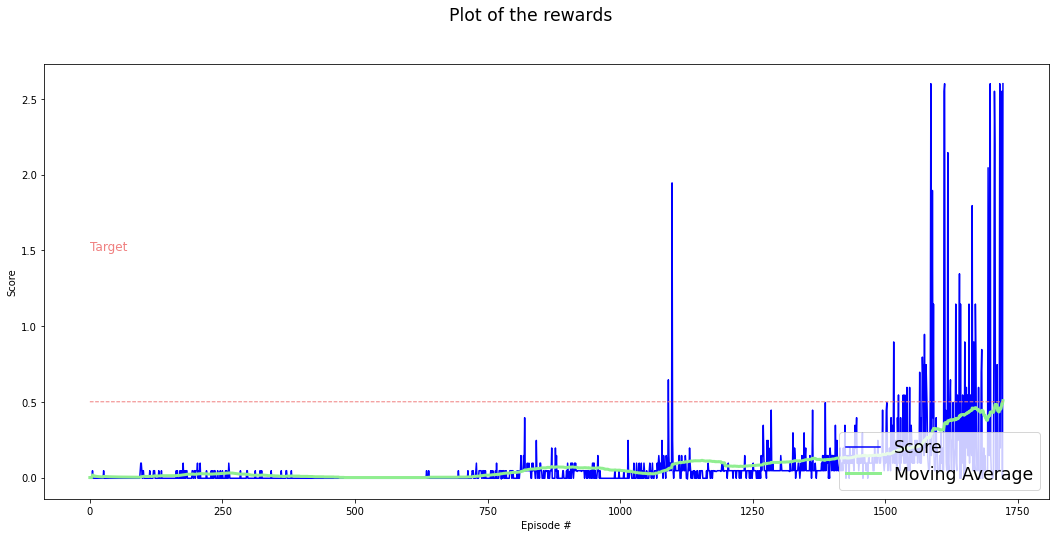

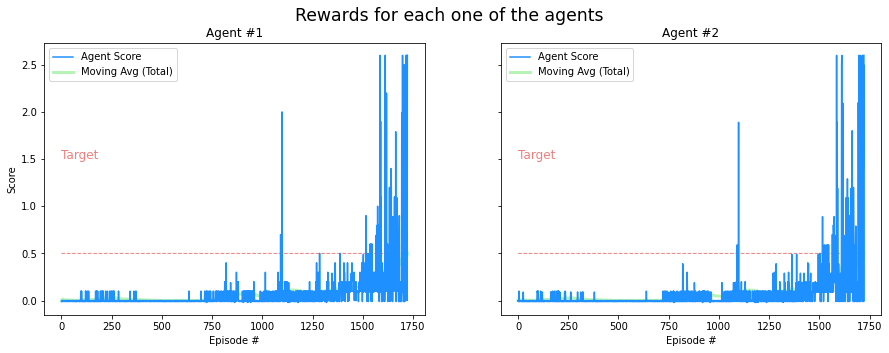

In [9]:
# Preprocess some variables
scores = score
scores_mean = scores#np.mean(scores, axis=1)
moving_avg_mean = moving_avg#np.mean(moving_avg, axis=1)
target = [_target_score] * len(scores) # Trace a line indicating the target value

# Plot the main graph with the scores and moving average
fig = plt.figure(figsize=(18,8))
fig.suptitle('Plot of the rewards', fontsize='xx-large')

ax = fig.add_subplot(111)
ax.plot(scores_mean, label='Score', color='Blue')
ax.plot(moving_avg_mean, label='Moving Average',
        color='LightGreen', linewidth=3)
ax.plot(target, linestyle='--', color='LightCoral', linewidth=1 )
ax.text(0, _target_score+1, 'Target', color='LightCoral', fontsize='large')
ax.set_ylabel('Score')
ax.set_xlabel('Episode #')
ax.legend(fontsize='xx-large', loc='lower right')

plt.show()

# constrained_layout=True, 
# Plot one graph for each one of the 20 Agents, if that is the case
fig, axs = plt.subplots(1, 2, figsize=(15, 5),\
                            sharex=True, sharey=True)
fig.suptitle('Rewards for each one of the agents', fontsize='xx-large')

axs = axs.flatten()
for idx, (ax, s) \
        in enumerate(zip(axs, [scores1, scores2])):
    ax.plot(s, label='Agent Score', color='DodgerBlue', zorder=2)
    ax.plot(moving_avg_mean, label='Moving Avg (Total)',
            color='LightGreen', linewidth=3, alpha=0.655, zorder=1)
    ax.plot(target, linestyle='--', color='LightCoral', linewidth=1, zorder=0)
    ax.text(0, _target_score+1, 'Target', color='LightCoral', fontsize='large')

    ax.set_title('Agent #%d' % (idx+1))
    ax.set_ylabel('Score')
    ax.set_xlabel('Episode #')
    ax.label_outer()
    ax.legend(fontsize='medium')

plt.show()

#####


In [10]:

## Load the trained model
checkpoint = torch.load('checkpoint_ddpg_xx.pt', map_location='cpu')
agent1 = Agent(state_size, action_size, random_seed=0,num_agents=2)
agent1.actor_local.load_state_dict(checkpoint['actor_dict'])
agent1.critic_local.load_state_dict(checkpoint['critic_dict'])
agent1.actor_target.load_state_dict(checkpoint['actor_dict'])
agent1.critic_target.load_state_dict(checkpoint['critic_dict'])


Using:  cpu
Actor network built: [Linear(in_features=24, out_features=128, bias=True), Linear(in_features=128, out_features=64, bias=True), Linear(in_features=64, out_features=2, bias=True)]
Actor network built: [Linear(in_features=24, out_features=128, bias=True), Linear(in_features=128, out_features=64, bias=True), Linear(in_features=64, out_features=2, bias=True)]
Critic network built: [Linear(in_features=24, out_features=128, bias=True), Linear(in_features=130, out_features=64, bias=True), Linear(in_features=64, out_features=1, bias=True)]
Critic network built: [Linear(in_features=24, out_features=128, bias=True), Linear(in_features=130, out_features=64, bias=True), Linear(in_features=64, out_features=1, bias=True)]


In [11]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = agent1.act(states)                        # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.max(scores)))

Total score (averaged over agents) this episode: 1.1000000163912773
Total score (averaged over agents) this episode: 0.10000000149011612
Total score (averaged over agents) this episode: 2.600000038743019
Total score (averaged over agents) this episode: 2.7000000402331352
Total score (averaged over agents) this episode: 0.0
